# Torus phase portrait and square representation for two oscillators

## Uncoupled case:

In [21]:
import numpy as np
import matplotlib.pyplot as plt


In [22]:
# Time parameters
t_max = 200
n_steps = 20000
t = np.linspace(0, t_max, n_steps)

In [23]:
# Two independent frequencies
omega1 = 2.
omega2 = 3

In [24]:
# Angles evolving on torus
theta1 = (omega1 * t) % (2 * np.pi)
theta2 = (omega2 * t) % (2 * np.pi)

In [25]:
# Torus embedding
R = 2.0  # major radius
r = 0.5  # minor radius

In [26]:
# Cartesian coordinates:

x = (R + r * np.cos(theta2)) * np.cos(theta1)

y = (R + r * np.cos(theta2)) * np.sin(theta1)

z = r * np.sin(theta2)

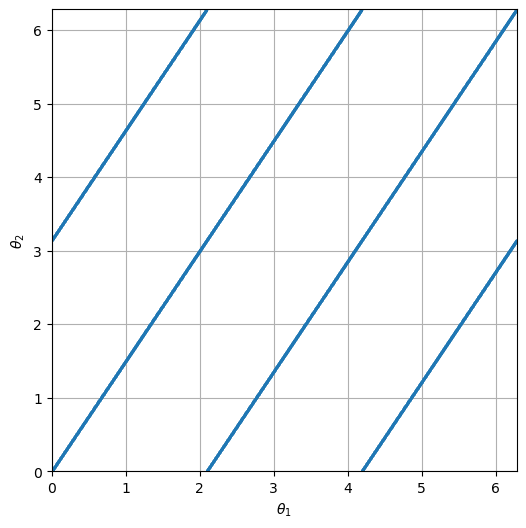

In [27]:
plt.figure(figsize=(6, 6))

plt.plot(theta1, theta2, '.', markersize=1)

plt.xlabel(r"$\theta_1$")
plt.ylabel(r"$\theta_2$")

plt.xlim(0, 2*np.pi)
plt.ylim(0, 2*np.pi)

plt.grid(True)

plt.show()

# Torus portrait:

In [28]:
from mpl_toolkits.mplot3d import Axes3D

In [29]:
# Reference torus mesh
u = np.linspace(0, 2*np.pi, 100)
v = np.linspace(0, 2*np.pi, 100)

U, V = np.meshgrid(u, v)

# Coordinates for the torus
X = (R + r * np.cos(V)) * np.cos(U)
Y = (R + r * np.cos(V)) * np.sin(U)
Z = r * np.sin(V)

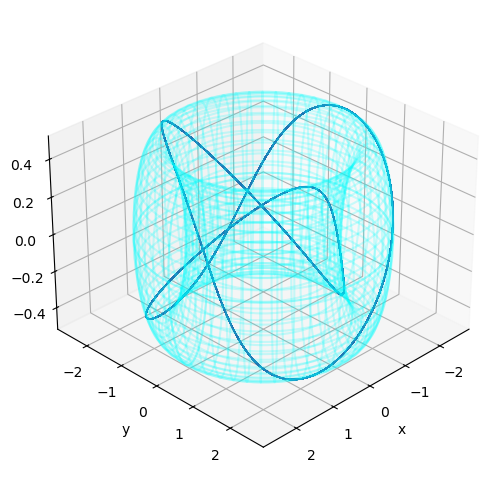

In [30]:
fig = plt.figure(figsize=(7, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot(x, y, z, linewidth=1.)

ax.plot_wireframe(X, Y, Z, alpha=0.2, color = "cyan")

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

ax.view_init(elev=30, azim=45)

plt.show()


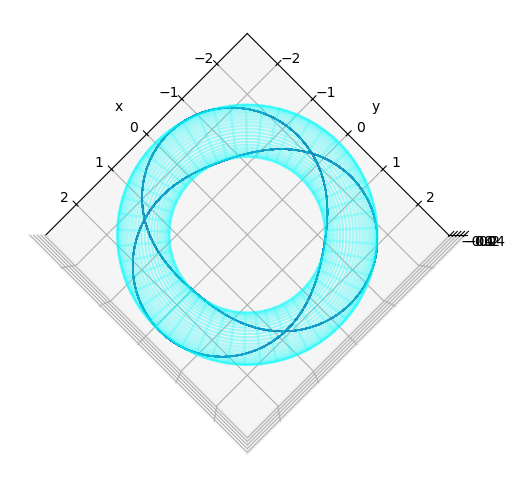

In [31]:
fig = plt.figure(figsize=(7, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot(x, y, z, linewidth=1.)

ax.plot_wireframe(X, Y, Z, alpha=0.2, color = "cyan")

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

ax.view_init(elev=90, azim=45)

plt.show()


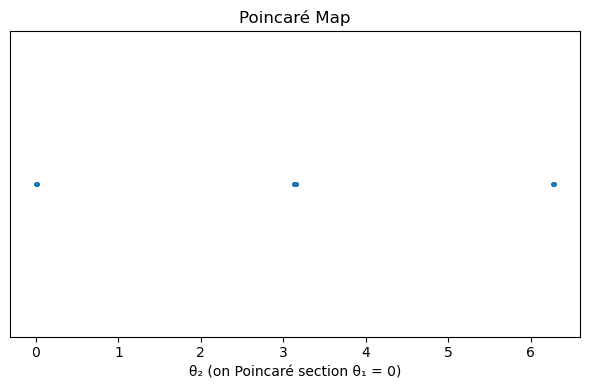

In [32]:
# --- Poincaré map: theta1 = 0 mod 2π ---
eps = 0.01  # thickness of the section
mask = (np.abs(theta1 - 0) < eps) | (np.abs(theta1 - 2*np.pi) < eps)

poincare_points = theta2[mask]

plt.figure(figsize=(6, 4))
plt.plot(poincare_points, np.zeros_like(poincare_points), '.', markersize=4)
plt.xlabel("θ₂ (on Poincaré section θ₁ = 0)")
plt.title("Poincaré Map")
plt.yticks([])  # 1D map
plt.tight_layout()
plt.show()

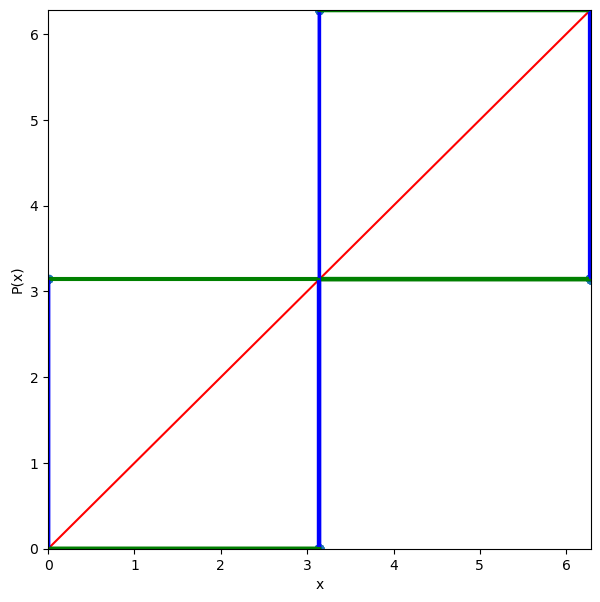

In [33]:
p = theta2[mask]

# Sort to make cobweb more readable
p_sorted = np.sort(p)

# Create 1D map: x_n -> x_{n+1}
x_n = p[:-1]
x_np1 = p[1:]

# Cobweb diagram for the Poincaré map
plt.figure(figsize=(7,7))

# Plot P(x)
#plt.plot(, color = "yellow")

plt.scatter(x_n, x_np1, s=20)

# Plot diagonal
plt.plot([0, 2*np.pi], [0, 2*np.pi], color = "red")

# Cobweb lines
steps = len(x_n)
x = x_n[0]

for k in range(steps):
    y = x_np1[k]
    plt.plot([x, x], [x, y], color = "blue")
    plt.plot([x, y], [y, y], color = "green")
    x = y

plt.xlabel("x")
plt.ylabel("P(x)")

plt.xlim(0, 2*np.pi)
plt.ylim(0, 2*np.pi)

plt.show()


### Commments:

- The plotted lines join those two points repeatedly and produce the diamond shape with vertical and horizontal segments.

- The blue verticals and green horizontals are the cobweb lines drawn between two discrete points ($0$ and $\pi$).

- Every orbit alternates between two points separated by $\pi$.